# **Prueba de dispersion de datos aleatorios implementando MPLClassifier que usa Multi-Layer Perceptron (MLP) algorithm**

# Importaciones 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing
import warnings

warnings.filterwarnings('ignore')

# Creación de datos simulados

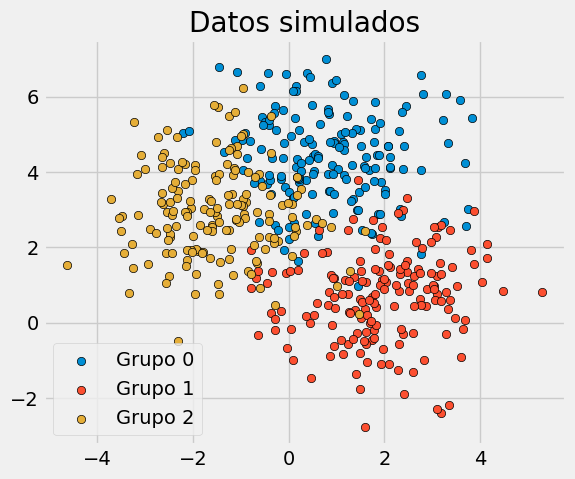

In [5]:
X, y = make_blobs(
        n_samples    = 500, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 1.2, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],  # grafica por cada categoria primero los y que son 0....
        y = X[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],  # color diferente a acda grupo y la forma es la misma
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )

ax.set_title('Datos simulados')
ax.legend();